모델 훈련
===

설정
---

In [2]:
from __future__ import division, print_function, unicode_literals

import numpy as np
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.unicode_minus'] = False

import platform
from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Unknown system')
    
import os
PROJECT_DIR = r'C:\Users\default.DESKTOP-S5Q9GAA\Documents\Programs\study_datascience\scikit_learn\handson\images'
CHAPTER_ID = 'training_linear_models'

if os.path.isdir(os.path.join(PROJECT_DIR, CHAPTER_ID)):
    pass
else:
    os.makedirs(os.path.join(PROJECT_DIR, CHAPTER_ID))

    
def save_fig(fig_id, tight_layout = True):
    path = os.path.join(PROJECT_DIR, CHAPTER_ID, fig_id + 'png')
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = 'png', dpi = 300)
    
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

정규 방정식을 사용한 선형 회귀
----

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

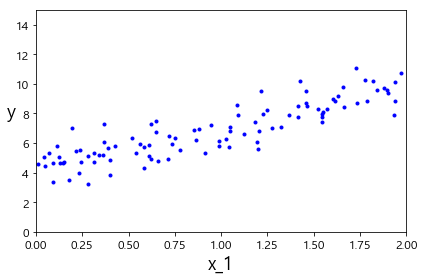

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('x_1', fontsize = 18)
plt.ylabel('y', rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])
save_fig('generated_data_plot')
plt.show()

In [5]:
# 정규 방정식을 이용하여 Theta 값 예측하기
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [8]:
# theta_best를 사용해 theta_hat 예측해보기
# x값에 0을 넣었을 때 4.2, 2를 넣었을 때 9.7이라는 값을 예측함
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

In [9]:
X_new_b

array([[1., 0.],
       [1., 2.]])

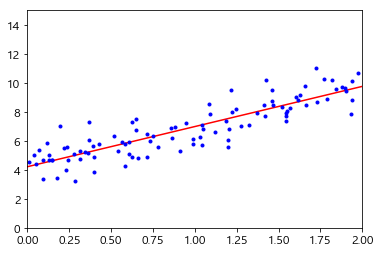

In [10]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
# 같은 작업을 하는 사이킷런 코드
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [12]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

배치 경사하강법
-----

In [13]:
# 배치 경사 하강법
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.21509616],
       [2.77011339]])

In [15]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('x_1', fontsize = 18)
    plt.axis([0, 2, 0, 15])
    plt.title(r'$\eta = {}$'.format(eta), fontsize = 16)

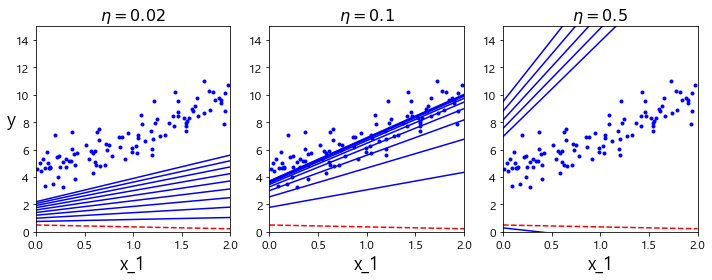

In [16]:
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize = (10, 4))
plt.subplot(131);
plot_gradient_descent(theta, eta = 0.02)
plt.ylabel('y', rotation = 0, fontsize = 18)
plt.subplot(132)
plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta = 0.5)

save_fig('gradient_descent_plot')
plt.show()